# Spotify Data Exploration: the Popularity Feature

## Intro:

After retrieving some data from the Spotify API (for more info about that check out [this notebook](https://github.com/tgel0/spotify-data/blob/master/notebooks/SpotifyDataRetrieval.ipynb)) it's time to get some insights. In this notebook, I will use data collected during the months of August and September 2018 to identify the most popular tracks and artists on Spotify using the 'popularity' featue.

## About the Popularity Feature:

From the [official Spotify docs](https://developer.spotify.com/documentation/web-api/reference/search/search/): 
>"The popularity of the track. The value will be between 0, for least popular, and 100 for most popular. 
The popularity of a track is a value between 0 and 100, with 100 being the most popular. Popularity is based mainly on the total number of playbacks. Duplicate tracks, such as both in a single and in an album, are popularity rated differently. 
Note: This value is not updated in real-time and may therefore lag behind in actual popularity."

## Goal of this Notebook:

The goal is to use the previously retrieved data to gain insights from the popularity feature such as most popular tracks and most popular artists by analyzing and visualizing the data using Python libraries Pandas, Numpy and Matplotlib.

# start



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import pandas as pd 
import numpy as np


url = 'http://www.zernach.com/wp-content/uploads/2020/02/SpotifyAudioFeaturesApril2019.csv'

#print(songs.shape)
#songs

#path = '/content/drive/My Drive/Lambda colabs /Projects /Spotify_thing/spotify-data-master/SpotifyAudioFeaturesApril2019.csv'
df_spot = (pd.read_csv(url))
df_spot['track_index_num'] = df_spot.index
print(df_spot.shape)
df_spot

(130663, 18)


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,track_index_num
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15,0
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0,1
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56,2
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0,3
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57,130658
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60,130659
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47,130660
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50,130661


# 1. Top 50 most Popular Tracks

In [0]:
# most popular
sorted_popular = df_spot.sort_values('popularity', ascending=False).iloc[0:49]

In [0]:
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_top50 = sorted_popular['artist_name'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(y = df_spot['artist_name'], order=df_top50)

sns.despine(fig=None, ax=None, top=True, right=True, left=False, trim=False)
sns.set(rc={'figure.figsize':(6,7.2)})

ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Songs per Artist in Top 50', fontsize=16, fontweight='heavy')
sns.set(font_scale = 1.4)
ax.axes.get_xaxis().set_visible(False)
ax.set_frame_on(False)

y = df_spot['artist_name'].value_counts()
for i, v in enumerate(y):
    ax.text(v + 0.2, i + .16, str(v), color='black', fontweight='light', fontsize=14)
    
plt.savefig('top50_songs_per_artist.jpg', bbox_inches="tight")

ValueError: ignored

Error in callback <function flush_figures at 0x7f6010e8e9d8> (for post_execute):


KeyboardInterrupt: ignored

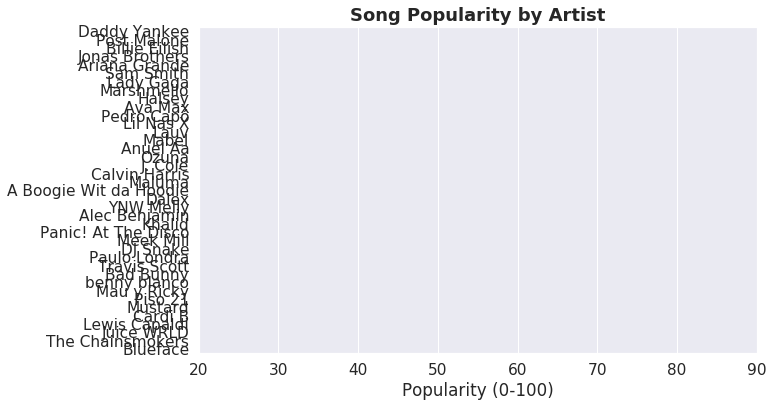

In [8]:
popularity = sorted_popular['popularity']
artists = sorted_popular['artist_name']

plt.figure(figsize=(10,6))

ax = sns.boxplot(x=popularity, y=artists, data=sorted_popular)
plt.xlim(20,90)
plt.xlabel('Popularity (0-100)')
plt.ylabel('')
plt.title('Song Popularity by Artist', fontweight='bold', fontsize=18)
plt.savefig('top50_artist_popularity.jpg', bbox_inches="tight")

work inspired by https://ashleygingeleski.com/2019/11/11/spotify-web-api-how-to-pull-and-clean-top-song-data-using-python/

# 2. Top Artists by Popularity

Note: the Spotify API offers a special popularity score on artist-level as well. That score is not used here.

Instead, I have used only the popularity scores of their individual tracks.

In [0]:
# show top 20 artists by number of tracks in top 100
df_spot[['artist_name','track_name']].groupby('artist_name').count().sort_values('track_name', ascending=False).head(20)

,track_name
artist_name,
Johann Sebastian Bach,3621
Wolfgang Amadeus Mozart,1755
Armin van Buuren,1124
Ludwig van Beethoven,928
Frédéric Chopin,614
Claude Debussy,451
Image Sounds,369
Waka Flocka Flame,273
Los Cadetes De Linares,266


In [0]:
# show top 20 artists by total popularity of their tracks in top 100
df_spot[['artist_name','popularity']].groupby('artist_name').sum().sort_values('popularity', ascending=False).head(20)

,popularity
artist_name,
Johann Sebastian Bach,32155
Wolfgang Amadeus Mozart,18318
Armin van Buuren,16729
Ludwig van Beethoven,10931
Frédéric Chopin,8380
Claude Debussy,4996
YoungBoy Never Broke Again,4694
Binaural Beats Sleep,4527
Above & Beyond,3941


# 4. Visualizing Popularity

For this visualization I borrowed the code from another project of mine - [Twitter 10k (plot number 5)](https://github.com/tgel0/twitter-10k/blob/master/Twitter10k.ipynb).

In [0]:
import matplotlib as plt
# create a new transposed dataframe where the track names are the columns and individual popularities the rows
df_top10_pop = df_spot[['track_name','popularity']].set_index('track_name').head(10).T

# set the figure size
plt.figure(figsize=(12,18))
 
# create a color palette
palette = plt.get_cmap('Set1')

# multiple line plot of the top10 track popularities
num=0
for track in df_top10_pop.columns:
    num+=1
 
    # find the right spot on the plot
    plt.subplot(10,1, num)
    
    # plot the individual popularities
    df_top10_pop.loc[['popularity'],track].plot(marker='', color=palette(num), linewidth=2.5)
    
    # same limits for every subplot
    plt.ylim(90,100)
    
    # get current position of the ticks
    locs, labels = plt.xticks()

    # add ticks with custom labels
    mylabels = ['','7th August', '','', '','30th August', '','','', '20th September'] # a bit ugly but it works
    plt.xticks(locs, mylabels)

    # not ticks everywhere
    if num in range(10) :
        plt.tick_params(labelbottom=False)
        
    # add title
    plt.title(track, loc='left', fontsize=10, fontweight=0, color=palette(num))
    
# add general title
plt.suptitle("Popularity of Top 10 Tracks during Summer 2019", fontsize=13, fontweight=0, color='black', style='italic');

TypeError: ignored